<a href="https://colab.research.google.com/github/jelly12paw/00/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import mode # 결측값을 최빈값으로 대체
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA # 주성분 분석

In [41]:
df = pd.read_csv('http://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USJudgeRatings.csv')

In [4]:
df.head()

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43 non-null     object 
 1   CONT        43 non-null     float64
 2   INTG        43 non-null     float64
 3   DMNR        43 non-null     float64
 4   DILG        43 non-null     float64
 5   CFMG        43 non-null     float64
 6   DECI        43 non-null     float64
 7   PREP        43 non-null     float64
 8   FAMI        43 non-null     float64
 9   ORAL        43 non-null     float64
 10  WRIT        43 non-null     float64
 11  PHYS        43 non-null     float64
 12  RTEN        43 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.5+ KB


In [7]:
# 왜도 계산하기 : skew()

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [8]:
# log() 변환
# 양의 왜도일 때 : np.log()
# 음의 왜도일 때 : np.log(np.max(x + 1) - x)

df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


In [9]:
# log10() 변환

df['CONT2'] = np.log10(df['CONT'])
df['PHYS2'] = np.log10(np.max(df['PHYS'] + 1) - df['PHYS'])

# 왜도 계산
print(ss.skew(df['CONT2']))
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.5824357748750438


In [10]:
data = [['철수', 52], ['영희', 92], ['미영', 84], ['시완', 71], ['미경', 65],
      ['영환', 81], ['숙경', 66], ['부영', 77], ['민섭', 73], ['보연', 74]]

df = pd.DataFrame(data, columns=['이름', '수학점수'])

df

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [12]:
df['수학점수'].mean()

73.5

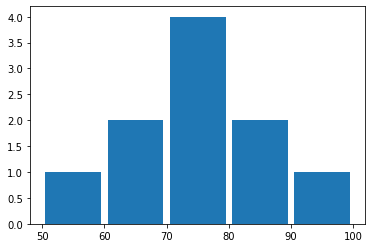

In [13]:
plt.hist(df['수학점수'], bins = 5, range = [50, 100], rwidth = 0.9)
plt.show()

In [14]:
df['등급'] = 0

df.loc[(df['수학점수'] < 60), '등급'] = 'F'
df.loc[(df['수학점수'] >= 60) & (df['수학점수'] < 70), '등급'] = 'D'
df.loc[(df['수학점수'] >= 70) & (df['수학점수'] < 80), '등급'] = 'C'
df.loc[(df['수학점수'] >= 80) & (df['수학점수'] < 90), '등급'] = 'B'
df.loc[(df['수학점수'] >= 90) & (df['수학점수'] <= 100), '등급'] = 'A'

df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [16]:
# cut() 사용하여 등급 지정하기
# pd.cut(x = 데이터, bins = 경계값리스트, labels = 이름, include_lowest = True)
# x : 등급을 지정할 데이터 값
# bins : 경계값(범위한도) 설정
# labels : 각 구간의 이름 설정
# include_lowest = True : 각 구간의 낮은 경계값을 포함

df['등급_cut'] = pd.cut(x = df['수학점수'], 
                      bins = [0, 60, 70, 80, 90, 100],
                      labels = ['F', 'D', 'C', 'B', 'A'],
                      include_lowest = True)

df

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,C
8,민섭,73,C,C
9,보연,74,C,C


In [17]:
# qcut() 함수 : cut() 함수와 다르게 균등한 비율로 구간을 나눔
# pd.qcut(x = 데이터, q = 나눌 구간의 갯수, labels = 각 구간의 이름)

df['등급_qcut'] = pd.qcut(x = df['수학점수'], q = 5, labels = ['F', 'D', 'C', 'B', 'A'])

df

,이름,수학점수,등급,등급_cut,등급_qcut
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C


In [42]:
# 주성분 분석 (PCA)

df = pd.read_csv('http://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
# drop() : 해당 컬럼 제외하기

iris = df.drop(['species'], axis = 1)
iris_s = df['species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
# 수치형 변수 정규화

iris['sepal_length'] = StandardScaler().fit_transform(iris[['sepal_length']])
iris['sepal_width'] = StandardScaler().fit_transform(iris[['sepal_width']])
iris['petal_length'] = StandardScaler().fit_transform(iris[['petal_length']])
iris['petal_width'] = StandardScaler().fit_transform(iris[['petal_width']])

# 주성분 분석 (PCA)

pca = PCA(n_components = 4)
p_score = pca.fit_transform(iris)

print(p_score.shape)
print(pca.explained_variance_ratio_)

(150, 4)
[0.72962445 0.22850762 0.03668922 0.00517871]


In [16]:
# 결측치 처리 : isnull()

df = pd.read_csv('http://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# 결측치 합계

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 결측치 처리방법 1 - 삭제

# dropna() : 결측치가 있는 행 전체 삭제
# 데이터.dropna(axis = 0) : 결측치가 있는 모든 행 삭제
# 데이터.dropna(axis = 1) : 결측치가 있는 모든 열 삭제
# 데이터.dropna(subset = ['컬럼명'], axis = 0) : 특정 컬럼의 결측치가 있는 모든 행 삭제

df1 = df.dropna(axis = 0)

print(df1.isnull().sum().sum())
print(df1.shape)

0
(183, 12)


In [7]:
# 결측치 처리방법 2 - 대체값

# fillna() : NaN 값을 지정값으로 대체

print(df['Age'].isnull().sum())

age_mean = df['Age'].mean()
print(age_mean)

df['Age'].fillna(age_mean, inplace = True) # 결측값을 평균값으로 대체
print(df['Age'].isnull().sum())

177
29.69911764705882
0


In [8]:
df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [17]:
# 결측치 처리방법 2 - 대체값

# mode() : 결측값을 최빈값으로 대체

print(df['Embarked'].isnull().sum())

em_mode = df['Embarked'].mode()
print(em_mode[0])

df['Embarked'].fillna(em_mode[0], inplace = True) # 결측값을 최빈값으로 대체
print(df['Embarked'].isnull().sum())

2
S
0


In [21]:
# 결측치 처리방법 2 - 대체값

# fillna(method = 'ffill', inplace = True) : 결측값을 인접값(직전 행의 값)으로 대체
# fillna(method = 'bfill', inplace = True) : 결측값을 인접값(직후 행의 값)으로 대체

f_em = df['Embarked'].fillna(method = 'ffill', inplace = True)
print(f_em)

b_em = df['Embarked'].fillna(method = 'bfill', inplace = True)
print(b_em)

None
None


In [23]:
tit = pd.read_csv('http://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [24]:
# 결측치를 그룹별 평균값으로 대체

# 그룹별 평균값

print(tit.groupby('Sex')['Age'].mean()) # 각 성별의 평균 나이
print(tit.groupby('Pclass')['Age'].mean()) # 좌석등급 별 평균 나이

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [26]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
# 좌석등급 별 평균 나이로 결측치 대체

df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace = True)

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


In [28]:
data = 10 * np.random.randn(200) + 50 # 평균 50, 표준편차 10인 난수 200개 생성
df = pd.DataFrame({'값' : data})

df

,값
0,55.073188
1,54.597131
2,54.957410
3,41.172547
4,33.347464
...,...
195,59.088742
196,66.949338
197,52.147070
198,48.056630


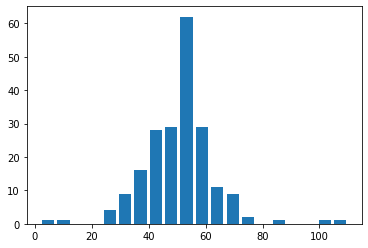

In [31]:
# 임의의 이상치 삽입

df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 히스토그램 시각화
plt.hist(df['값'], bins = 20, rwidth = 0.8)
plt.show()

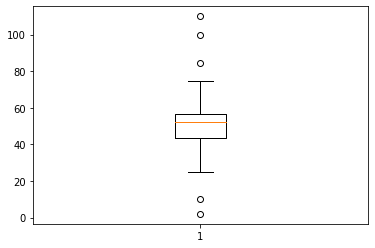

In [33]:
# 박스플롯 시각화

plt.boxplot(df['값'])
plt.show()

In [34]:
# 사분위값 나타내기 - quanile(.25)

q1 = df['값'].quantile(.25) # 1사분위
q2 = df['값'].quantile(.5)  # 2사분위
q3 = df['값'].quantile(.75) # 3사분위
iqr = q3 - q1               # 사분위범위

print('1사분위 :', q1)
print('2사분위 :', q2)
print('3사분위 :', q3)
print('사분위범위 :', iqr)

1사분위 : 43.51905896560302
2사분위 : 52.029586772841014
3사분위 : 56.412359930044914
사분위범위 : 12.893300964441892


In [35]:
# 사분위값 나타내기 - describe()['25%']

Q1 = df['값'].describe()['25%']
Q2 = df['값'].describe()['50%']
Q3 = df['값'].describe()['75%']
IQR = Q3 - Q1

print('Q1 =', Q1)
print('Q2 =', Q2)
print('Q3 =', Q3)
print('IQR =', IQR)

Q1 = 43.51905896560302
Q2 = 52.029586772841014
Q3 = 56.412359930044914
IQR = 12.893300964441892


In [36]:
# 이상치

# Q3 + IQR * 1.5 < 이상치 
# 이상치 < Q1 - IQR * 1.5 

con = df['값'] > (Q3 + IQR * 1.5)
upcon = df[con]

con = df['값'] < (Q1 - IQR * 1.5)
lowcon = df[con]

print(lowcon)
print(upcon)

        값
201   2.0
203  10.0
              값
190   84.307572
202  100.000000
204  110.000000


In [37]:
# 평활화 : 데이터 분포를 매끄럽게 처리하여 데이터의 추세를 알기 쉽게 함

df = pd.read_csv('http://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv')

print(df.head(5))
print(df.describe())

   Unnamed: 0  time  value
0           1  1821    269
1           2  1822    321
2           3  1823    585
3           4  1824    871
4           5  1825   1475
       Unnamed: 0         time        value
count  114.000000   114.000000   114.000000
mean    57.500000  1877.500000  1538.017544
std     33.052988    33.052988  1585.843914
min      1.000000  1821.000000    39.000000
25%     29.250000  1849.250000   348.250000
50%     57.500000  1877.500000   771.000000
75%     85.750000  1905.750000  2566.750000
max    114.000000  1934.000000  6991.000000


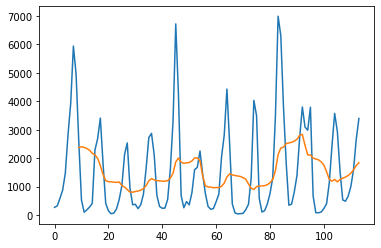

In [38]:
# 평활화 방법 1 - 단순이동평균

# rolling(n).mean() : n = 데이터 개수

df['sma'] = df['value'].rolling(10).mean() # 10년 단순이동평균

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

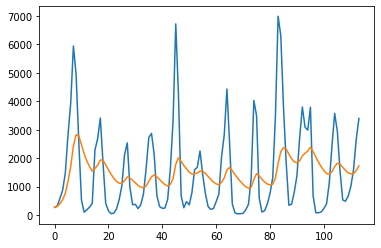

In [39]:
# 평활화 방법 2 - 지수가중이동평균

# ewm(n).mean() : n = 데이터 개수

df['ewm'] = df['value'].ewm(10).mean() # 10년 지수가중이동평균

plt.plot(df['value'])
plt.plot(df['ewm'])
plt.show()